<a href="https://colab.research.google.com/github/damoon843/Blink-1470/blob/main/scripts/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTANT:** access this notebook from Google Drive, not from the 'Open in Colab' feature on Github

In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>Sound of Music!</b></marquee>

**Drive & Github & Colab Integration Workflow:**
  
  Drive: mount project repo in shared folder to and access files within repo (must keep shared folder directly below 'My Drive')  

  Github: version control scripts and store data  
  
  Colab: use free GPU access provided by Google to define runtime environment

In [1]:
# Mount shared folder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [28]:
"""
NOTE: only run this once. To run multiple times, Runtime -> Restart runtime
"""
# %cd /content/drive/My Drive/CS1470 Final Project
# !git clone https://github.com/damoon843/Blink-1470.git

"""
NOTE: if the pull command below is causing issues, run the this. Essentially,
this says forget everything on the current working branch and make it the exact 
same as origin/main. You should be able to pull after.
"""
# !git reset --hard origin/main

"""
NOTE: uncomment to pull latest changes from remote repo
"""
%cd /content/drive/My Drive/CS1470 Final Project/Blink-1470
!git checkout main
!git pull

"""
NOTE: to push changes, File -> Save as Copy in Github (under 'scripts' folder)
"""

/content/drive/My Drive/CS1470 Final Project/Blink-1470
M	data/blues/blues.00000.wav
M	data/blues/blues.00001.wav
M	data/blues/blues.00002.wav
M	data/blues/blues.00003.wav
M	data/blues/blues.00004.wav
M	data/blues/blues.00005.wav
M	data/blues/blues.00006.wav
M	data/blues/blues.00007.wav
M	data/blues/blues.00008.wav
M	data/blues/blues.00009.wav
M	data/blues/blues.00010.wav
M	data/blues/blues.00011.wav
M	data/blues/blues.00012.wav
M	data/blues/blues.00013.wav
M	data/blues/blues.00014.wav
M	data/blues/blues.00015.wav
M	data/blues/blues.00016.wav
M	data/blues/blues.00017.wav
M	data/blues/blues.00018.wav
M	data/blues/blues.00019.wav
M	data/blues/blues.00020.wav
M	data/blues/blues.00021.wav
M	data/blues/blues.00022.wav
M	data/blues/blues.00023.wav
M	data/blues/blues.00024.wav
M	data/blues/blues.00025.wav
M	data/blues/blues.00026.wav
M	data/blues/blues.00027.wav
M	data/blues/blues.00028.wav
M	data/blues/blues.00029.wav
M	data/blues/blues.00030.wav
M	data/blues/blues.00031.wav
M	data/blues/blu

"\nNOTE: to push changes, File -> Save as Copy in Github (under 'scripts' folder)\n"

**Install and load in relevant modules**


In [4]:
%cd /content/drive/My Drive/CS1470 Final Project/Blink-1470/scripts
# !pip install -U setuptools
# !pip install -r requirements.txt
!pip install librosa
!pip install matplotlib
!pip install playsound
!pip install scipy
!pip install scikit-image

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from random import shuffle

/content/drive/My Drive/CS1470 Final Project/Blink-1470/scripts


**Preprocess**

In [ ]:
"""
NOTE: run to re-shuffle data
"""
%cd /content/drive/My Drive/CS1470 Final Project/Blink-1470/scripts
from preprocess import *

train, validate, test = preprocess.main()

# Save into 'data' folder in Drive
%cd /content/drive/My Drive/CS1470 Final Project/data
np.save('/content/drive/MyDrive/CS1470 Final Project/data/preprocess_data', preprocess_data)

/content/drive/.shortcut-targets-by-id/1co3s70vHB8VewmFAAuamnQ7__VUzF_Df/CS1470 Final Project/Blink-1470/scripts


NameError: ignored

In [ ]:
# Unpack tuples of data
train_data = train[0]
train_labels = train[1]
validate_data = validate[0]
validate_labels = validate[1]
test_data = test[0]
test_labels = test[1]

# Save preprocess data into 'data' folder in Drive
%cd /content/drive/My Drive/CS1470 Final Project/data

np.save('/content/drive/MyDrive/CS1470 Final Project/data/train_data', train_data)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/train_labels', train_labels)

np.save('/content/drive/MyDrive/CS1470 Final Project/data/validate_data', validate_data)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/validate_labels', validate_labels)

np.save('/content/drive/MyDrive/CS1470 Final Project/data/test_data', test_data)
np.save('/content/drive/MyDrive/CS1470 Final Project/data/test_labels', test_labels)

/content/drive/My Drive/CS1470 Final Project/data


In [5]:
# Load in preprocess data -> RUN THIS BEFORE RUNNING MODEL
%cd /content/drive/My Drive/CS1470 Final Project/data

train_data = np.load('/content/drive/MyDrive/CS1470 Final Project/data/train_data.npy')
train_labels = np.load('/content/drive/MyDrive/CS1470 Final Project/data/train_labels.npy')

validate_data = np.load('/content/drive/MyDrive/CS1470 Final Project/data/validate_data.npy')
validate_labels = np.load('/content/drive/MyDrive/CS1470 Final Project/data/validate_labels.npy')

test_data = np.load('/content/drive/MyDrive/CS1470 Final Project/data/test_data.npy')
test_labels = np.load('/content/drive/MyDrive/CS1470 Final Project/data/test_labels.npy')

/content/drive/My Drive/CS1470 Final Project/data


**Run model**

In [6]:
# Instantiate the model
%cd /content/drive/My Drive/CS1470 Final Project/Blink-1470/scripts
from model import BasicCNN

"""
NOTE: relevant dimensions/sizes for the model
train_data: 8000
validate_data: 1000
test_data: 1000
spectrogram matrix: [128,128]
"""
model = BasicCNN()

/content/drive/My Drive/CS1470 Final Project/Blink-1470/scripts


In [7]:
"""
NOTE: data must be reshaped to [-1, 128, 128, 1] for convolution
Consider doing this in preprocess
"""
train_data = np.reshape(train_data, (-1, 128, 128, 1))
validate_data = np.reshape(validate_data, (-1, 128, 128, 1))
test_data = np.reshape(test_data, (-1, 128, 128, 1))

In [8]:
# Validate data shapes

print(f"train data: {train_data.shape}")
print(f"train labels: {train_labels.shape}")
print(f"validate data: {validate_data.shape}")
print(f"validate labels: {validate_labels.shape}")
print(f"test data: {test_data.shape}")
print(f"test labels: {test_labels.shape}")

train data: (8000, 128, 128, 1)
train labels: (8000,)
validate data: (1000, 128, 128, 1)
validate labels: (1000,)
test data: (990, 128, 128, 1)
test labels: (990,)


epoch: 0
batch loss: 2.302217960357666
batch accuracy: 0.1171875
batch loss: 2.302485227584839
batch accuracy: 0.0625
batch loss: 2.3025214672088623
batch accuracy: 0.09375
batch loss: 2.3026785850524902
batch accuracy: 0.078125
batch loss: 2.3026483058929443
batch accuracy: 0.109375
batch loss: 2.3025026321411133
batch accuracy: 0.140625
batch loss: 2.302872896194458
batch accuracy: 0.109375
batch loss: 2.3025941848754883
batch accuracy: 0.0625
batch loss: 2.302941083908081
batch accuracy: 0.0625
batch loss: 2.3030264377593994
batch accuracy: 0.09375
batch loss: 2.3024680614471436
batch accuracy: 0.078125
batch loss: 2.302905559539795
batch accuracy: 0.1015625
batch loss: 2.302011013031006
batch accuracy: 0.15625
batch loss: 2.302938938140869
batch accuracy: 0.0859375
batch loss: 2.302206039428711
batch accuracy: 0.0859375
batch loss: 2.302973508834839
batch accuracy: 0.109375
batch loss: 2.3030104637145996
batch accuracy: 0.1015625
batch loss: 2.302873134613037
batch accuracy: 0.0703

Text(0, 0.5, 'Loss')

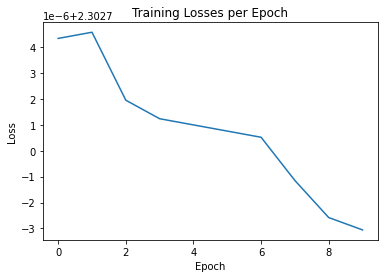

In [11]:
# Run model on training set

def train(model, train_data, train_labels):
  """ 
  Run through a single epoch on train set
  :return: list of batch losses and average train accuracy across all batches
  """
  # Set model hyperparameters
  bsz = model.batch_sz = 128
  model.hlayer_sz = 1024

  train_loss = []
  train_accuracy = []
  for start, end in zip(range(0, len(train_data) - bsz, bsz), range(bsz, len(train_data), bsz)):
    batched_train = tf.convert_to_tensor(train_data[start:end, :, :, :])
    batched_labels = tf.convert_to_tensor(train_labels[start:end])

    with tf.GradientTape() as tape:
      logits = model.call(batched_train)
      batch_loss = model.loss_func(logits, batched_labels)
      train_loss.append(batch_loss)
      print(f"batch loss: {batch_loss}")
    
    batch_accuracy = model.accuracy_func(logits, batched_labels)
    train_accuracy.append(batch_accuracy)
    print(f"batch accuracy: {batch_accuracy}")

    gradients = tape.gradient(batch_loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(gradients,model.trainable_variables))
  
  accuracy = tf.reduce_mean(train_accuracy)
  return train_loss, accuracy

# Call train
# NOTE: training for 10 epochs
epoch_losses = []
epoch_accuracies = []
for i in range(10):
  print(f"epoch: {i}")
  losses, accuracy = train(model, train_data, train_labels)
  avg_loss = tf.reduce_mean(losses) # Average losses across all batches
  epoch_losses.append(avg_loss)
  epoch_accuracies.append(accuracy)
  print(f"epoch train accuracy: {accuracy}")
  print(f"epoch average loss: {avg_loss}")

final_accuracy = tf.reduce_mean(epoch_accuracies)
print(f"final accuracy across all epochs: {final_accuracy}")

# Uncomment to visualize train losses
x = [i for i in range(10)]
plt.plot(x, epoch_losses)
plt.title("Training Losses per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

batch accuracy: 0.109375
batch accuracy: 0.15625
batch accuracy: 0.078125
batch accuracy: 0.03125
batch accuracy: 0.078125
batch accuracy: 0.109375
batch accuracy: 0.078125
batch accuracy: 0.0625
batch accuracy: 0.09375
batch accuracy: 0.109375
batch accuracy: 0.09375
batch accuracy: 0.109375
batch accuracy: 0.078125
batch accuracy: 0.109375
batch accuracy: 0.171875
final validation accuracy: 0.09791667014360428


Text(0, 0.5, 'Loss')

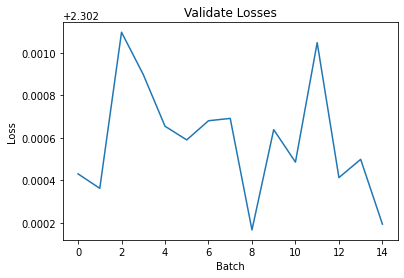

In [12]:
# Run model on validation set -- treat this as the 'test' set for now
# NOTE: this evaluation will become more biased with more runs and should be used to tune hyperparameters

def validate(model, validate_data, validate_labels):
  """
  Run model on validation set and assess accuracy
  :return: list of batch losses and average validation accuracy across all batches
  """
  # Set model hyperparameters
  bsz = model.batch_sz = 64
  model.hlayer_sz = 1024
  model.dropout_rate = 0 # No regularization during validation

  validate_loss = []
  validate_accuracy = []
  for start, end in zip(range(0, len(validate_data) - bsz, bsz), range(bsz, len(validate_data), bsz)):
    batched_validate = tf.convert_to_tensor(validate_data[start:end, :, :, :])
    batched_labels = tf.convert_to_tensor(validate_labels[start:end])

    logits = model.call(batched_validate)
    batch_loss = model.loss_func(logits, batched_labels)
    validate_loss.append(batch_loss)

    batch_accuracy = model.accuracy_func(logits, batched_labels)
    validate_accuracy.append(batch_accuracy)
    print(f"batch accuracy: {batch_accuracy}")

  accuracy = tf.reduce_mean(validate_accuracy)
  return validate_loss, accuracy

# Call validate
losses, accuracy = validate(model, validate_data, validate_labels)
print(f"final validation accuracy: {accuracy}")

# Uncomment to visualize validate losses
x = [i for i in range(len(losses))]
plt.plot(x, losses)
plt.title("Validate Losses")
plt.xlabel("Batch")
plt.ylabel("Loss")


In [ ]:
# Run model on test set and assess test accuracies
# NOTE: do not run this

def test(model, test_data, test_labels):
  """
  Run model on test set and assess accuracy
  """
  pass

In [ ]:
def mask(input):
  """
  input: tensor of shape (btch_size, x, y, channels)
  
  returns: Masks of size (btch_size, x, y, channels)
  """
  assert input.shape[1] == input.shape[2], "Spectrograms not squares"

  height_width = input.shape[1]
  np_input = input.numpy()
  #ind = np.unravel_index(np.argmax(np_input, axis=3), np_input.shape)
  #print(ind)
  max_row = np.argmax(np_input, axis=(1,2))
  #max_val = np.amax(max_row, axis=1)
  print(max_row)

  return 
  
#test_mask
x = np.array([[1,3,2],[4,5,6],[7,8,9]])
x = tf.convert_to_tensor(x)
x = tf.reshape(x, [1, 3, 3, 1])
#print(x.numpy()[0, 2, 1, 0])

#print(x)
print(mask(x))

x = np.array([[[1,3,2],[4,5,6],[7,8,9]], [[1,3,2],[4,5,6],[7,8,9]]])
x = tf.convert_to_tensor(x)
x = tf.reshape(x, [1, 3, 3, 2])
#print(x.numpy()[0, :, :, 1])
print(mask(x))

TypeError: ignored